# Derivatives

 Börge Göbel, Jan 2022

## 1. Mathematical definition of a derivative

![Derivative](figure_04_derivatives.png)

\\( f'(x)=\lim_{h\rightarrow 0}\frac{f(x+h)-f(x)}{h}\\)

\\( f'(x)=\lim_{h\rightarrow 0}\frac{f(x)-f(x-h)}{h}\\)

\\( f'(x)=\lim_{h\rightarrow 0}\frac{f(x+h)-f(x-h)}{2h}\\)

All three definitions are equivalent in case of a continuous function.

## 2. Numerical implementation of first-order derivatives

Forward differences
\\( f'(x_n)\approx\frac{f(x_{n+1})-f(x_n)}{x_{n+1}-x_n}\\)

Backward differences
\\( f'(x)\approx\frac{f(x_n)-f(x_{n-1})}{x_n-x_{n-1}}\\)

Central differences
\\( f'(x)\approx\frac{f(x_{n+1})-f(x_{n-1})}{x_{n+1}-x_{n-1}}\\)

### Example function: \\( f(x)=\sin(x)x-\frac{1}{100}x^3 \\)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style()

In [6]:
def f(x):
    return np.sin(x)*x - 1/100*x**3

In [9]:
x_list = np.linspace(-10, 10, 201)

In [10]:
y_list = f(x_list)

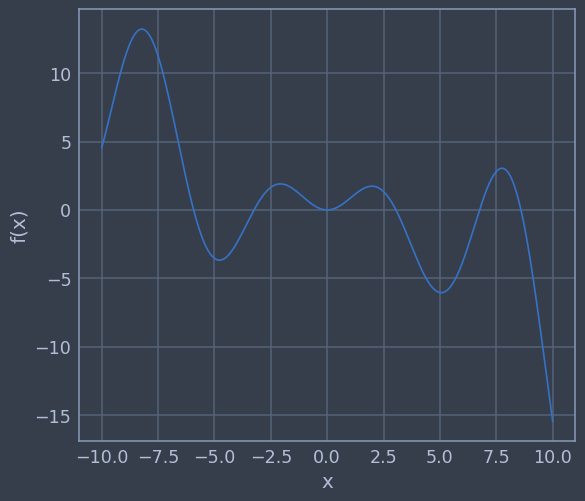

In [11]:
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x_list, y_list)

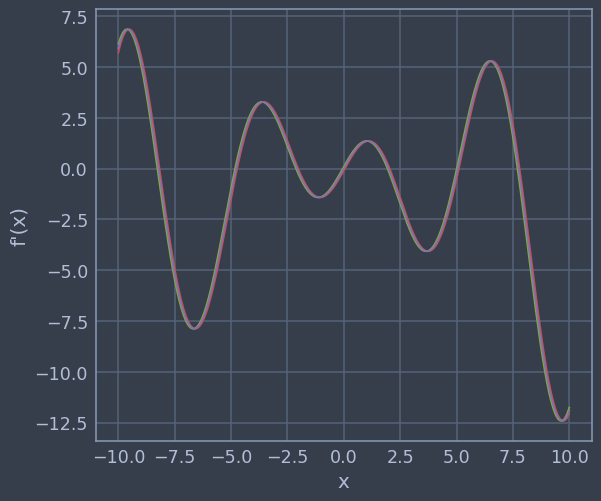

In [15]:
x_list = np.linspace(-10, 10, 201)
analytica_d_list = np.cos(x_list)*x_list + np.sin(x_list) - 3/100*x_list**2

h = 0.1
foward_d_list = (f(x_list+h) - f(x_list))/h
backward_d_list = (f(x_list) - f(x_list-h))/h
central_d_list = (f(x_list+h) - f(x_list-h))/(2*h)

plt.xlabel('x')
plt.ylabel("f'(x)")
plt.plot(x_list, analytica_d_list)
plt.plot(x_list, foward_d_list)
plt.plot(x_list, backward_d_list)
plt.plot(x_list, central_d_list)

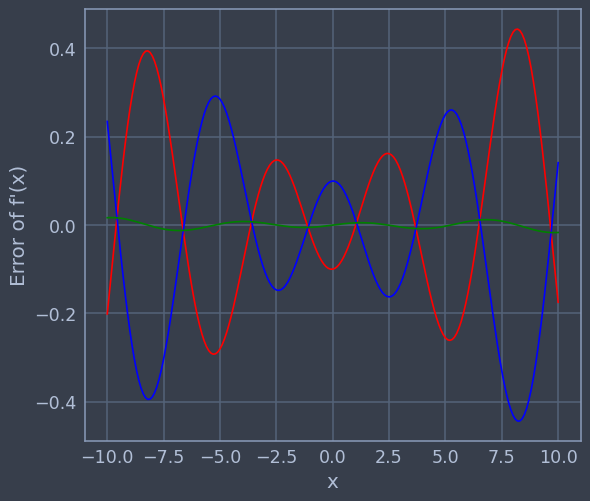

In [17]:
plt.xlabel('x')
plt.ylabel("Error of f'(x)")
plt.plot(x_list, analytica_d_list - foward_d_list, 'red')
plt.plot(x_list, analytica_d_list - backward_d_list, 'blue')
plt.plot(x_list, analytica_d_list - central_d_list,'green')

### Why is central differences (typically) better than forward and backward differences?

Forward differences
\\( f'(x)=\frac{f(x+h)-f(x)}{h}+\mathcal{O}(h)\\)

Backward differences
\\( f'(x)=\frac{f(x)-f(x-h)}{h}+\mathcal{O}(h)\\)

Central differences
\\( f'(x)=\frac{f(x+h)-f(x-h)}{2h}+\mathcal{O}(h^2)\\)

- \\(\mathcal{O}(h^n)\\) means that the error is proportional to h^n.
- Since \\(h\\) is small, the central differences method is more accurate. Why?

Taylor expansion: 

\\(f(x+h)=f(x)+f'(x)h+\frac{1}{2}f''(x)h^2+\frac{1}{6}f'''(x)h^3+\dots\\)

\\(f(x-h)=f(x)-f'(x)h+\frac{1}{2}f''(x)h^2-\frac{1}{6}f'''(x)h^3\pm\dots\\)

- From the first and second line we can imediately see the  \\(\mathcal{O}(h)\\) dependence of the forward and backward differences methods

\\(f'(x)=\frac{1}{h}\left[f(x+h)-f(x)-\frac{1}{2}f''(x)h^2-\frac{1}{6}f'''(x)h^3+\dots\right]=\frac{f(x+h)-f(x)}{h}-\frac{1}{2}f''(x)h-\frac{1}{6}f'''(x)h^2+\dots\\)

\\(f'(x)=\frac{1}{h}\left[f(x)-f(x-h)+\frac{1}{2}f''(x)h^2-\frac{1}{6}f'''(x)h^3\pm\dots\right]=\frac{f(x)-f(x-h)}{h}+\frac{1}{2}f''(x)h-\frac{1}{6}f'''(x)h^2\pm\dots\\)


- To find the \\(\mathcal{O}(h^2)\\) dependence of the central differences method, we have to subtract the two terms

\\(f(x+h)-f(x-h)=2f'(x)h+\frac{1}{3}f'''(x)h^3+\dots\\)

\\(\frac{1}{2h}\left[f(x+h)-f(x-h)\right]=f'(x)+\frac{1}{6}f'''(x)h^2+\dots\\)

\\( f'(x)=\frac{f(x+h)-f(x-h)}{2h}+\mathcal{O}(h^2)\\)

### Higher accuracy:

Richardson: \\(f'(x)=\frac{1}{12h}\left[f(x-2h)-8f(x-h)+8f(x+h)-f(x+2h)\right]+\mathcal{O}(h^4)\\)

In [19]:
def D1Richardson(f, x, h):
    # f: Function
    # x: Argument of f
    # h: Stepsize
    return 1/(12*h)*(f(x-2*h) - 8*f(x-h) + 8*f(x+h) - f(x+2*h))

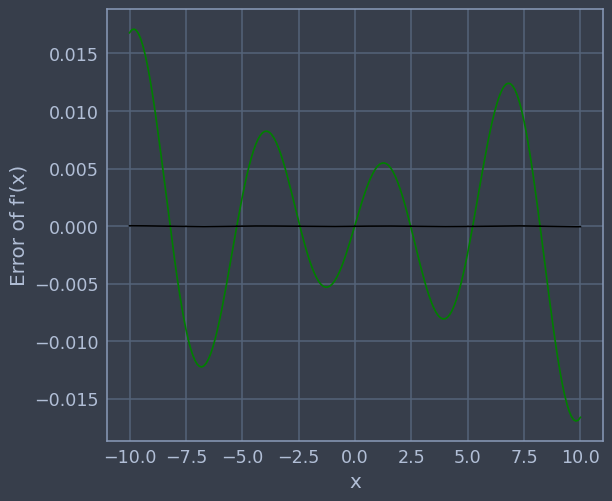

In [22]:
plt.xlabel('x')
plt.ylabel("Error of f'(x)")
richard_d_list = D1Richardson(f, x_list, h)
#plt.plot(x_list, analytica_d_list - foward_d_list, 'red')
#plt.plot(x_list, analytica_d_list - backward_d_list, 'blue')
plt.plot(x_list, analytica_d_list - central_d_list,'green')
plt.plot(x_list, analytica_d_list - richard_d_list, 'black')

### Even higher accuracy

Iteration formula:

\\(D_{n+1}=\frac{2^{2n}D_n(h)-D_n(2h)}{2^{2n}-1}\\)

In [23]:
def D1nRichardson(nmax, f, x, h):
    # n: Order of iteratino for the 1st derivative
    # f: Function
    # x: Argument of f
    # h: Stepsize
    d0 = np.array([D1Richardson(f,x,h*2**j) for j in range(0,nmax)])
    for n in range(1,nmax):
        print(d0)
        d = np.array([(2**(2*n)*d0[j] - d0[j+1])/(2**(2*n)-1) for j in range(0,len(d0)-1)])
        d0 = d
    return d
    

Calculate f'(x) for \\( f(x)=\sin(x)x-\frac{1}{100}x^3 \\) at \\(x = 3\\)

In [30]:
d1n = D1nRichardson(5, f, 3, h)

[-3.09884994 -3.09873722 -3.09695717 -3.06993837 -2.72051967]
[-3.09888752 -3.09933057 -3.10596344 -3.18641127]
[-3.09885798 -3.09888837 -3.10060025]
[-3.0988575 -3.0988612]


Comparison to D1Richardson

In [31]:
print(D1Richardson(f, 3, h))
print(D1Richardson(f, 3, 2*h))
print(D1Richardson(f, 3, 4*h))
print(D1Richardson(f, 3, 8*h))
print(D1Richardson(f, 3, 16*h))

-3.0988499416783317
-3.098737217338038
-3.0969571739647574
-3.0699383701235057
-2.7205196742684765


Analytical result: \\( f'(3)=3\cos(3)+\sin(3)-\frac{3}{100}\cdot 3^2 \\)

In [33]:
3*np.cos(3)+np.sin(3)-(3/100)*3**2 - d1n

array([1.18064047e-09])

## 3. Second derivatives

We derive \\(f'(x)\\) another time

\\( f''(x)=\lim_{h\rightarrow 0}\frac{f'(x+h)-f'(x)}{h}\\)

\\( f''(x)=\lim_{h\rightarrow 0}\frac{f'(x)-f'(x-h)}{h}\\)

\\( f''(x)=\lim_{h\rightarrow 0}\frac{f'(x+h)-f'(x-h)}{2h}\\)

This gives us many possibilities for the definition of \\(f''(x)\\) based on \\(f(x)\\), e. g.

- Double forward & double backward

\\(f''(x)=\lim_{h\rightarrow 0}\frac{\left[f(x+2h)-f(x+h)\right]-\left[f(x+h)-f(x)\right]}{h^2}=\lim_{h\rightarrow 0}\frac{f(x+2h)-2f(x+h)+f(x)}{h^2}\\)

\\(f''(x)=\lim_{h\rightarrow 0}\frac{\left[f(x)-f(x-h)\right]-\left[f(x-h)-f(x-2h)\right]}{h^2}=\lim_{h\rightarrow 0}\frac{f(x)-2f(x-h)+f(x-2h)}{h^2}\\)

- Forward and backward

\\(f''(x)=\lim_{h\rightarrow 0}\frac{\left[f(x+h)-f(x)\right]-\left[f(x)-f(x-h)\right]}{h^2}=\lim_{h\rightarrow 0}\frac{f(x+h)-2f(x)+f(x-h)}{h^2}\\)

- Double central (same result as forward and backward for \\(2h=g\\))

\\(f''(x)=\lim_{h\rightarrow 0}\frac{\left[f(x+2h)-f(x)\right]-\left[f(x)-f(x-2h)\right]}{(2h)^2}=\lim_{h\rightarrow 0}\frac{f(x+2h)-2f(x)+f(x-2h)}{4h^2}=\lim_{g\rightarrow 0}\frac{f(x+g)-2f(x)+f(x-g)}{g^2}\\)

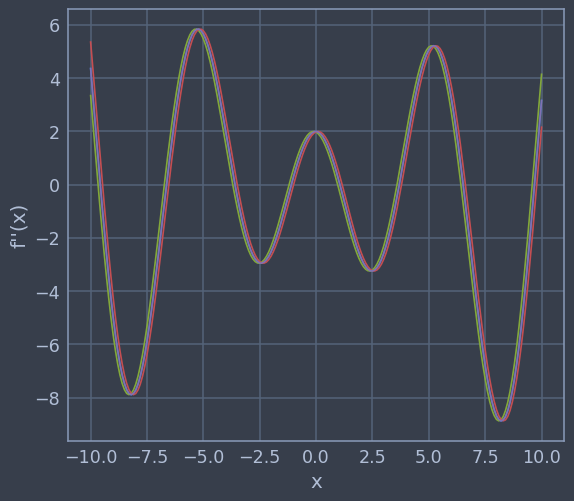

In [34]:
x_list = np.linspace(-10, 10, 201)
analytica_d2_list = -np.sin(x_list)*x_list + 2*np.cos(x_list) - 6/100*x_list

h = 0.1
foward_d2_list = (f(x_list+2*h) - 2*f(x_list+h)+f(x_list))/h**2
backward_d2_list = (f(x_list) - 2*f(x_list-h)+f(x_list-2*h))/h**2
central_d2_list = (f(x_list+h) - 2*f(x_list)+f(x_list-h))/(h**2)

plt.xlabel('x')
plt.ylabel("f''(x)")
plt.plot(x_list, analytica_d2_list)
plt.plot(x_list, foward_d2_list)
plt.plot(x_list, backward_d2_list)
plt.plot(x_list, central_d2_list)

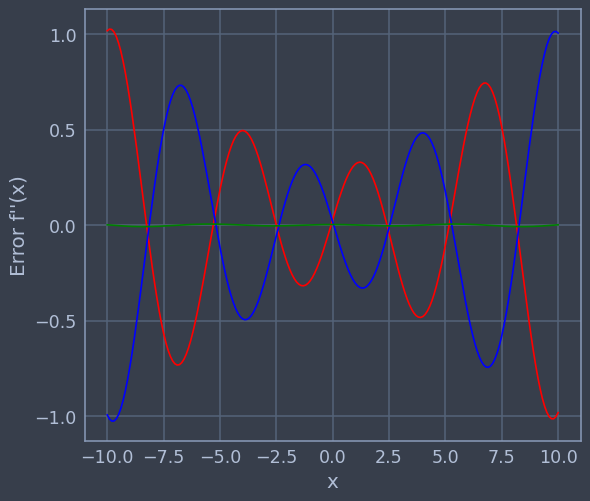

In [36]:
plt.xlabel('x')
plt.ylabel("Error f''(x)")
plt.plot(x_list, analytica_d2_list - foward_d2_list, 'red')
plt.plot(x_list, analytica_d2_list - backward_d2_list, 'blue')
plt.plot(x_list, analytica_d2_list - central_d2_list, 'green')

### Higher accuracy:

Richardson: \\(f''(x)=\frac{1}{12h^2}\left[-f(x-2h)+16f(x-h)-30f(x)+16f(x+h)-f(x+2h)\right]+\mathcal{O}(h^4)\\)

In [37]:
def D2Richardson(f, x, h):
    # f: Function
    # x: Argument of f
    # h: Stepsize
    return 1/(12*h**2)*(-f(x-2*h) + 16*f(x-h) - 30*f(x) + 16*f(x+h) - f(x + 2*h))

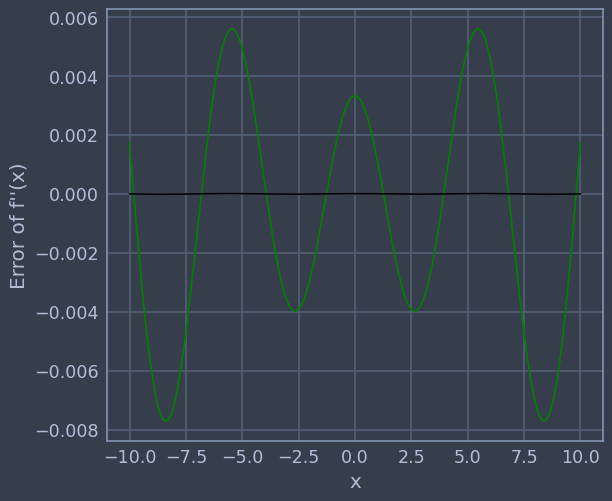

In [41]:
plt.xlabel('x')
plt.ylabel("Error of f''(x)")
richard_d2_list = D2Richardson(f, x_list, h)
#plt.plot(x_list, analytica_d_list - foward_d_list, 'red')
#plt.plot(x_list, analytica_d_list - backward_d_list, 'blue')
plt.plot(x_list, analytica_d2_list - central_d2_list,'green')
plt.plot(x_list, analytica_d2_list - richard_d2_list, 'black')

## 4. Gradient, Divergence & Curl

Now we consider a multidimensional function which means, the function depends on multiple variables 

\\( f(x,y,z)\\)

or it is a function that has multiple dimensions itself

\\( \vec{g}(x,y,z)=\begin{pmatrix}g_x(x,y,z)\\g_y(x,y,z)\\g_z(x,y,z)\end{pmatrix}\\)

With the nabla operator \\( \nabla = \begin{pmatrix}\frac{\partial}{\partial x}\\\frac{\partial}{\partial y}\\\frac{\partial}{\partial z}\end{pmatrix}\\) we can calculate:

- gradient \\( \nabla f(x,y,z) = \begin{pmatrix}\frac{\partial}{\partial x}f(x,y,z)\\\frac{\partial}{\partial y}f(x,y,z)\\\frac{\partial}{\partial z}f(x,y,z)\end{pmatrix}\\)

- curl \\(\nabla\times \vec{g}(x,y,z) = \begin{pmatrix}
\frac{\partial}{\partial y}g_z(x,y,z) - \frac{\partial}{\partial z}g_y(x,y,z)\\
\frac{\partial}{\partial z}g_x(x,y,z) - \frac{\partial}{\partial x}g_z(x,y,z)\\
\frac{\partial}{\partial x}g_y(x,y,z) - \frac{\partial}{\partial y}g_x(x,y,z)\\
\end{pmatrix}\\)

- divergence \\(\nabla\cdot \vec{g}(x,y,z) = \frac{\partial}{\partial x}g_x(x,y,z)+\frac{\partial}{\partial y}g_y(x,y,z)+\frac{\partial}{\partial z}g_z(x,y,z)\\)

### Example 

\\(
f(\vec{r})=f(x,y,z) = \exp(-x^2-y^4)
\\)

\\(
\vec{g}(\vec{r})=\frac{\vec{r}}{r}=\begin{pmatrix}x/\sqrt{x^2+y^2+z^2}\\y/\sqrt{x^2+y^2+z^2}\\z/\sqrt{x^2+y^2+z^2}\end{pmatrix}
\\)

In [2]:
def f(r):
    return np.exp(-r[0]**2-r[1]**4)

def g(r):
    return r / np.linalg.norm(r)

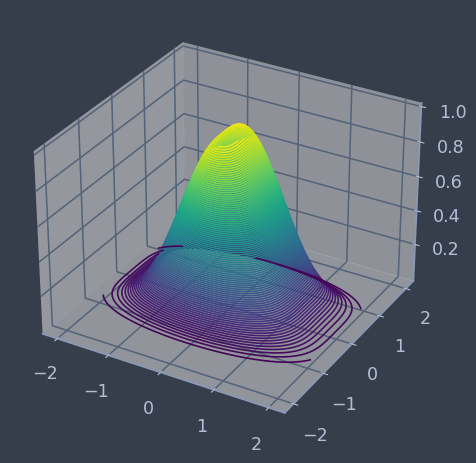

In [3]:
x3, y3 = np.meshgrid(np.linspace(-2,2,201),np.linspace(-2,2,201))
z3 = f( np.array([ x3, y3 ]) )

plotproj = plt.axes(projection='3d')
plotproj.contour3D(x3,y3,z3,100)

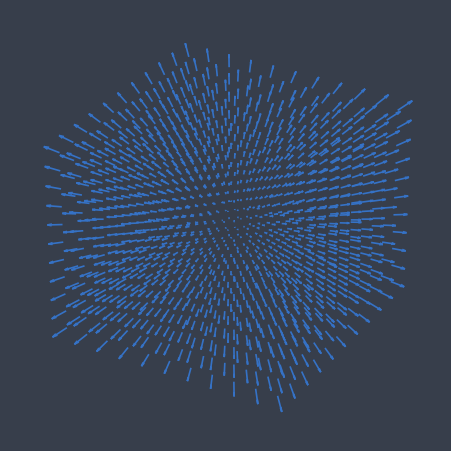

In [4]:
x3, y3, z3 = np.meshgrid(np.linspace(-2,2,11),np.linspace(-2,2,11),np.linspace(-2,2,11))
values = g( np.array([ x3, y3, z3 ]) )

arrowplot = plt.axes(projection='3d')
arrowplot.axis(False)

scale=7
arrowplot.quiver(
    x3, y3, z3,
    values[0]*scale,values[1]*scale,values[2]*scale
)

### Gradient

- analytical solution 

\\( \nabla f(x,y,z) = \begin{pmatrix}-2x\exp(-x^2-y^4)\\-4y^3\exp(-x^2-y^4)\\0\end{pmatrix} \\)

### Divergence

- analytical solution 

\\( \nabla \cdot \vec{g}(\vec{r}) = \frac{2}{r} \\)

### Curl

- analytical solution 

\\( \nabla \times \vec{g}(\vec{r}) = 0 \\)